# Supervised learning
- classification
- regression

## Q1: what is overfitting? and how can you avoid it?

There are 3 main methods:
- Regulization: L1 and L2. This is to add penalty to the loss function
    - L1: $$Loss=Loss + \lambda\sum_j|w_j|$$
    - L2: $$Loss=Loss + \lambda\sum_j|w_j|^2$$
- make a simple model: with lesser variables and parameters
- corss-validation: k-fold, training in k times, each time use different fold to validate

## Q2: what is the training set and testing set? how to split?
## Q3: how do you handle missing or corrupted data in a dataset?
## Q4: inductive and deductive ML?


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import sklearn.datasets as datasets


data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## K-Nearest Neighbors
To implement KNN
- Import KNeighborsClassifier
- load and prepare data
- create and train
- predict


In [27]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#load and prepare data
data = datasets.load_iris()
df= pd.DataFrame(data.data, columns=data.feature_names)

X= df.values
y = data.target

# shuffle and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (species)

# Shuffle and split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Linear regression: is a form of supervised learning, trained by a labled data. 
The goal is to estimate `f(x)` so that each feature has a lenear relationship to the target
`y=x*beta`, `y` is the output, `x` is the input and `beta` is the training weight
- There are 4 main assumptions:
    - linearity: linear relationship between X and Y
    - homogenety: constant variance of errors
    - independence: all the observation features have to be independent
    - normality: the residual should be normally distributed 

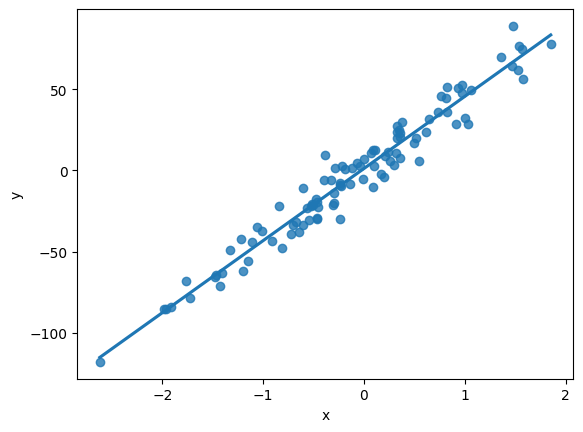

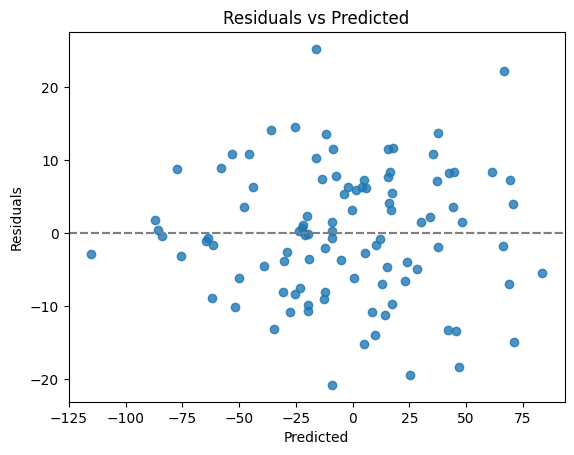

In [13]:
## Linearity (how to check the linearity: plot the residuals and the predicted values)
#!pip install scikit-learn pandas seaborn matplotlib
!pip install statsmodels

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Create DataFrame
df = pd.DataFrame({'x': X[:, 0], 'y': y})

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)
residuals = y - y_pred

# Plot regression line
sns.regplot(x='x', y='y', data=df, ci=None)

# Plot residuals vs predicted
plt.figure()
sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red'})
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(0, linestyle='--', color='gray')
plt.show()




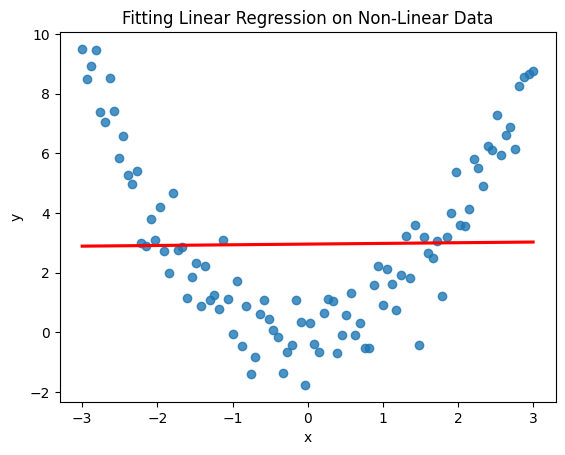

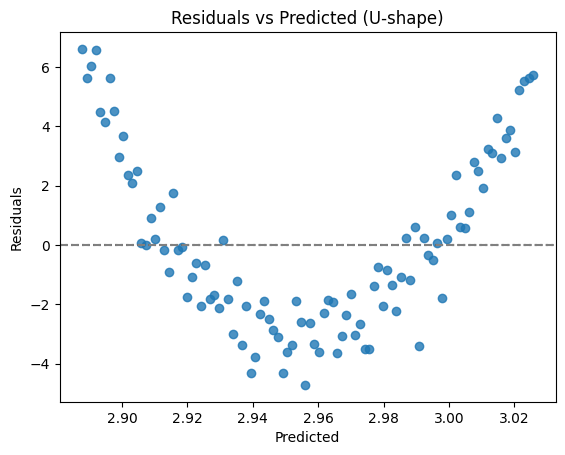

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Create synthetic non-linear data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = X**2 + np.random.normal(0, 1, size=X.shape)

# Reshape for sklearn
X_reshaped = X.reshape(-1, 1)

# Fit a linear model (intentionally incorrect)
model = LinearRegression()
model.fit(X_reshaped, y)
y_pred = model.predict(X_reshaped)
residuals = y - y_pred

# Plot regression line
df = pd.DataFrame({'x': X, 'y': y})
sns.regplot(x='x', y='y', data=df, ci=None, line_kws={"color": "red"})
plt.title("Fitting Linear Regression on Non-Linear Data")
plt.show()

# Residual plot
plt.figure()
sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red'})
plt.title("Residuals vs Predicted (U-shape)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(0, linestyle='--', color='gray')
plt.show()
